# **Lab 1**<br>

Refer to the following sample code to see how a periodic sinusoidal signal can be generated by providing some specified parameters. Play around with the code and see which parameter affects which aspect of the signal. Also note how graphs are plotted in python using the matplotlib library.

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 1.          0.96858316  0.87630668  0.72896863  0.53582679  0.30901699
  0.06279052 -0.18738131 -0.42577929 -0.63742399 -0.80901699 -0.92977649
 -0.9921147  -0.9921147  -0.92977649 -0.80901699 -0.63742399 -0.42577929
 -0.18738131  0.06279052  0.30901699  0.53582679  0.72896863  0.87630668
  0.96858316  1.          0.96858316  0.87630668  0.72896863  0.53582679
  0.30901699  0.06279052 -0.18738131 -0.42577929 -0.63742399 -0.80901699
 -0.92977649 -0.9921147  -0.9921147  -0.92977649 -0.80901699 -0.63742399
 -0.42577929 -0.18738131  0.06279052  0.30901699  0.53582679  0.72896863
  0.87630668  0.96858316  1.          0.96858316  0.87630668  0.72896863
  0.53582679  0.30901699  0.06279052 

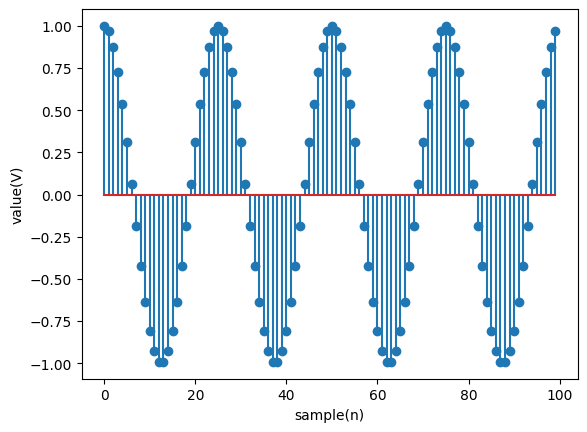

In [4]:
import numpy as np
import matplotlib.pyplot as plt


Fs = 100
f = 4

x = np.arange(Fs)
print(x)

y = np.cos(2 * np.pi * f * x / Fs)
print(y)

plt.stem(x, y)
plt.xlabel('sample(n)')
plt.ylabel('value(V)')
plt.show()


##Task 1
Given $x = [7, 6, 1, 2, 0, -1, 4, 3, -2, 0]$, write separate functions that would take the vector $x$ as a parameter and execute the following operations and return the changed vector:

1. Set the negative values of $x$ to 0.
2. Extract the values of $x$ that are greater than $3$ in another vector return it.
3. Add $3$ to the values of $x$ that are even.
4. Set the values of $x$ that are less than its mean to $0$.
5. Set the values of $x$ that are greater than the mean to be their difference with the mean.

In [12]:
#Your code here
X=[7,6,1,2,0,-1,4,3,-2,0]
temp=X
def function(x):
  t=[ ]
  n=len(x)
  mean=np.mean(x)
  for i in range (n):
    if x[i]<0:
      x[i]=0
  for i in range(n):
      if x[i]>3:
        t.append(x[i])
  for  i in range (n):
    if x[i]%2==0:
      x[i]+=3
  for  i in range (n):
     if x[i]<mean:
        x[i]=0
  for  i in range (n):
     if x[i]-mean>0:
      x[i]=abs( x[i]-mean)

  return t


print(function(X))
print('vector X :',X)
print(temp)

[7, 6, 4]
vector X : [5.0, 7.0, 0, 3.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0]
[5.0, 7.0, 0, 3.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0]


##Task 2
Plot the functions $x$, $x^3$, $e^x$, and $log_e(x)$ over the interval $0 ≤ x ≤ 5$. Use appropriate step size to create smooth graphs. Show all the functions in the same graph with different colours. Use labels and title
for your plot.


<ipython-input-34-d27f358d5dff>:7: RuntimeWarning: divide by zero encountered in log
  y3=(np.log(x))


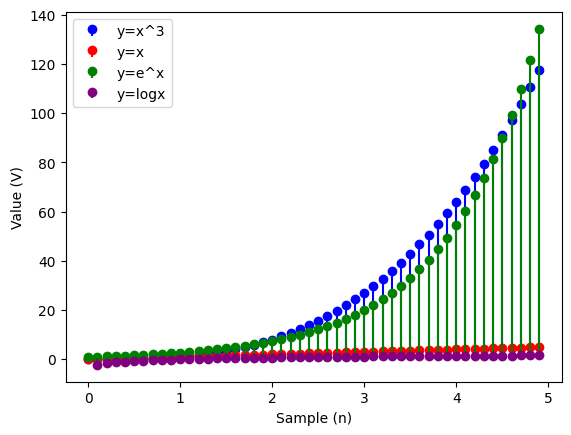

In [34]:
#Your code here
import math
x=np.arange(0,5,0.1)
y0=x
y1=x**3
y2=np.exp(x)
y3=(np.log(x))
plt.stem(x, y1, label='y=x^3', linefmt='b-', markerfmt='bo', basefmt=' ')
plt.stem(x, y0, label='y=x', linefmt='r-', markerfmt='ro', basefmt=' ')
plt.stem(x, y2, label='y=e^x', linefmt='g-', markerfmt='go', basefmt=' ')
plt.stem(x, y3, label='y=logx', linefmt='purple', markerfmt='purple', basefmt=' ')
plt.xlabel('Sample (n)')
plt.ylabel('Value (V)')
plt.legend()
plt.show()

##Task 3
Suppose a signal $s(n)$ is represented as two equal-sized arrays x and y where x contains the sample numbers and y contains the corresponding amplitudes.

1.   Write a function that takes an arbitrary signal $s(n)$ (as x and y) and a shift value $k$ as argument and returns a shifted signal $s(n-k)$. Note that if $k$ is positive, then the signal should be right-shifted (delayed) and if $k$ is negative then the signal should be left-shifted (advanced).

2.   Plot the shifted signal and the original signal side by side using subplot.


The function prototype for Task 3.1 is given as follows:

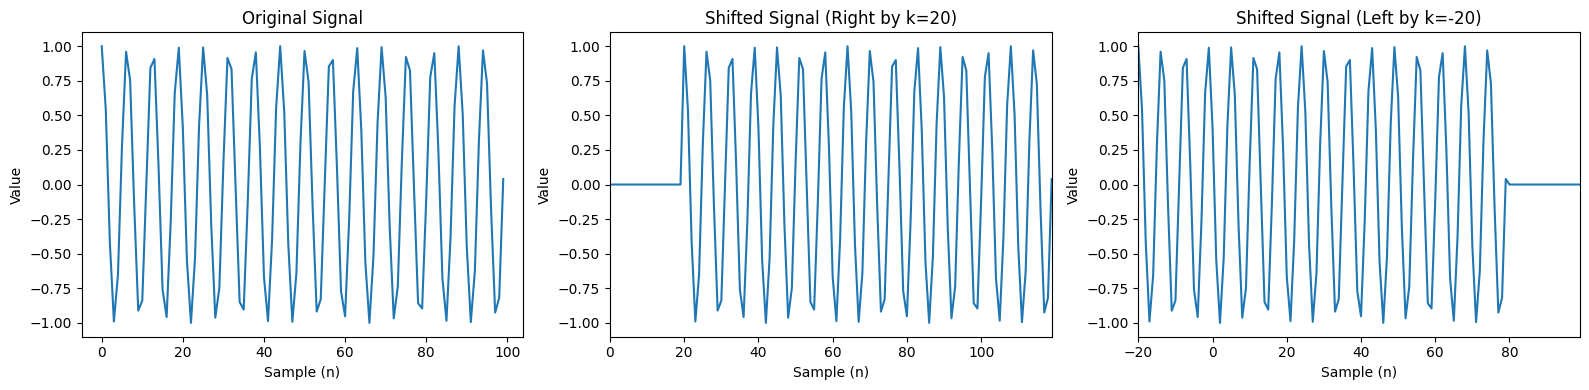

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def timeshift(x, y, k):
    # Shift the signal
    if k > 0:
        x_shifted = np.arange(len(x) + k)
        y_shifted = np.pad(y, (k, 0), mode='constant', constant_values=0)
        x_limits = [0, x[-1] + k]
    elif k < 0:
        x_shifted = np.arange(k,len(x-k))
        y_shifted = np.pad(y, (0, -k), mode='constant', constant_values=0)
        x_limits = [x[0] + k, x[-1]]
    else:
        x_shifted = x
        y_shifted = y
        x_limits = [x[0], x[-1]]

    return x_shifted, y_shifted, x_limits
x_original = np.arange(100)
y_original = np.cos(x_original)

# Shift the signal by k to the right
k_right = 20
x_shifted_right, y_shifted_right, x_limits_right = timeshift(x_original, y_original, k_right)

# Shift the signal by k  to the left
k_left = -20
x_shifted_left, y_shifted_left, x_limits_left = timeshift(x_original, y_original, k_left)

# Plotting side by side using subplots
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(x_original, y_original, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Sample (n)')
plt.ylabel('Value')

plt.subplot(1, 3, 2)
plt.plot(x_shifted_right, y_shifted_right, label='Shifted Signal (Right by k={})'.format(k_right))
plt.title('Shifted Signal (Right by k={})'.format(k_right))
plt.xlabel('Sample (n)')
plt.ylabel('Value')
plt.xlim(x_limits_right)

plt.subplot(1, 3, 3)
plt.plot(x_shifted_left, y_shifted_left, label='Shifted Signal (Left by k={})'.format(k_left))
plt.title('Shifted Signal (Left by k={})'.format(k_left))
plt.xlabel('Sample (n)')
plt.ylabel('Value')
plt.xlim(x_limits_left)

plt.tight_layout()
plt.show()
